# Olympics Overall Medal Count
---
---
---

# ALL IMPORTS

In [188]:
# Import Pandas for dataframe functions
import pandas as pd

# Import Path from Pathlib to read csv's
from pathlib import Path

# The hvPlot library is a visualization library that’s designed to work with Pandas DataFrames
# use it to create interactive plots for our data
import hvplot.pandas

# Import numpy to fill an empty column with NAN values
import numpy as np

#import cartopy.crs for helping with the geoplot
import cartopy.feature
import cartopy.crs as ccrs

# Import Prophet from prophet to run a simulation on medal count
from fbprophet import Prophet

ImportError: DLL load failed: The specified module could not be found.

---
---

# Read in csv of Winter Olympics Medal Data

In [4]:
# Read in the data from the "all_winter_medals_locations.csv" file into a Pandas DataFrame
all_winter_medals_df=pd.read_csv(Path('Resources/all_winter_medals_locations_gsb.csv'))

# Review the resulting DataFrame
all_winter_medals_df

,Year,Sport,Event,Country,Medal Rank,Lat,Lon,Gold,Silver,Bronze
0,2002,Freestyle Skiing,Women's Aerials,Australia,1,-35.266667,149.133333,1.0,NaN,NaN
1,2002,Short-Track Speedskating,"Men's 1,000 Meters",Australia,1,-35.266667,149.133333,1.0,NaN,NaN
2,2006,Freestyle Skiing,Men's Moguls,Australia,1,-35.266667,149.133333,1.0,NaN,NaN
3,2010,Freestyle Skiing,Women's Aerials,Australia,1,-35.266667,149.133333,1.0,NaN,NaN
4,2010,Snowboarding,Women's Halfpipe,Australia,1,-35.266667,149.133333,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3164,1988,Luge,Men's Doubles,West Germany,3,50.737400,7.098200,NaN,NaN,1.0
3165,1984,Alpine Skiing,Men's Giant Slalom,Yugoslavia,2,43.850000,18.250000,NaN,1.0,NaN
3166,1988,Alpine Skiing,Women's Slalom,Yugoslavia,2,43.850000,18.250000,NaN,1.0,NaN
3167,1988,Ski Jumping,"Men's Large Hill, Team",Yugoslavia,2,43.850000,18.250000,NaN,1.0,NaN


## Prepare the Data

### Fill NA Values with zero

In [5]:
# Fill NA values with zero
all_winter_medals_df = all_winter_medals_df.fillna(0)

# Confirm changes to DataFrame
all_winter_medals_df

,Year,Sport,Event,Country,Medal Rank,Lat,Lon,Gold,Silver,Bronze
0,2002,Freestyle Skiing,Women's Aerials,Australia,1,-35.266667,149.133333,1.0,0.0,0.0
1,2002,Short-Track Speedskating,"Men's 1,000 Meters",Australia,1,-35.266667,149.133333,1.0,0.0,0.0
2,2006,Freestyle Skiing,Men's Moguls,Australia,1,-35.266667,149.133333,1.0,0.0,0.0
3,2010,Freestyle Skiing,Women's Aerials,Australia,1,-35.266667,149.133333,1.0,0.0,0.0
4,2010,Snowboarding,Women's Halfpipe,Australia,1,-35.266667,149.133333,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3164,1988,Luge,Men's Doubles,West Germany,3,50.737400,7.098200,0.0,0.0,1.0
3165,1984,Alpine Skiing,Men's Giant Slalom,Yugoslavia,2,43.850000,18.250000,0.0,1.0,0.0
3166,1988,Alpine Skiing,Women's Slalom,Yugoslavia,2,43.850000,18.250000,0.0,1.0,0.0
3167,1988,Ski Jumping,"Men's Large Hill, Team",Yugoslavia,2,43.850000,18.250000,0.0,1.0,0.0


### Add columns for cumulative returns of Gold, Silver, Bronze

In [6]:
# Group the original csv by 'Country' and sum the boolean Gold, Silver, Bronze columns
cum_df=all_winter_medals_df.groupby('Country').sum()[['Gold', 'Silver', 'Bronze']]

# Merge the dataframes
combined_cum_returns_df=all_winter_medals_df.merge(cum_df.reset_index(drop=False), on='Country')

# Confirm that cumulative returns columns for medal types were created as Medal_x and Medal_y
combined_cum_returns_df

,Year,Sport,Event,Country,Medal Rank,Lat,Lon,Gold_x,Silver_x,Bronze_x,Gold_y,Silver_y,Bronze_y
0,2002,Freestyle Skiing,Women's Aerials,Australia,1,-35.266667,149.133333,1.0,0.0,0.0,5.0,5.0,5.0
1,2002,Short-Track Speedskating,"Men's 1,000 Meters",Australia,1,-35.266667,149.133333,1.0,0.0,0.0,5.0,5.0,5.0
2,2006,Freestyle Skiing,Men's Moguls,Australia,1,-35.266667,149.133333,1.0,0.0,0.0,5.0,5.0,5.0
3,2010,Freestyle Skiing,Women's Aerials,Australia,1,-35.266667,149.133333,1.0,0.0,0.0,5.0,5.0,5.0
4,2010,Snowboarding,Women's Halfpipe,Australia,1,-35.266667,149.133333,1.0,0.0,0.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3164,1988,Luge,Men's Doubles,West Germany,3,50.737400,7.098200,0.0,0.0,1.0,11.0,15.0,13.0
3165,1984,Alpine Skiing,Men's Giant Slalom,Yugoslavia,2,43.850000,18.250000,0.0,1.0,0.0,0.0,3.0,1.0
3166,1988,Alpine Skiing,Women's Slalom,Yugoslavia,2,43.850000,18.250000,0.0,1.0,0.0,0.0,3.0,1.0
3167,1988,Ski Jumping,"Men's Large Hill, Team",Yugoslavia,2,43.850000,18.250000,0.0,1.0,0.0,0.0,3.0,1.0


### Add column for total cumulative returns

In [7]:
# Sum the Medal_y cumulative returns and create a column of the output
combined_cum_returns_df['Total_y']=combined_cum_returns_df[['Gold_y', 'Silver_y', 'Bronze_y']].sum(axis=1)

# Confirm the creation of a Total_y column
combined_cum_returns_df

,Year,Sport,Event,Country,Medal Rank,Lat,Lon,Gold_x,Silver_x,Bronze_x,Gold_y,Silver_y,Bronze_y,Total_y
0,2002,Freestyle Skiing,Women's Aerials,Australia,1,-35.266667,149.133333,1.0,0.0,0.0,5.0,5.0,5.0,15.0
1,2002,Short-Track Speedskating,"Men's 1,000 Meters",Australia,1,-35.266667,149.133333,1.0,0.0,0.0,5.0,5.0,5.0,15.0
2,2006,Freestyle Skiing,Men's Moguls,Australia,1,-35.266667,149.133333,1.0,0.0,0.0,5.0,5.0,5.0,15.0
3,2010,Freestyle Skiing,Women's Aerials,Australia,1,-35.266667,149.133333,1.0,0.0,0.0,5.0,5.0,5.0,15.0
4,2010,Snowboarding,Women's Halfpipe,Australia,1,-35.266667,149.133333,1.0,0.0,0.0,5.0,5.0,5.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3164,1988,Luge,Men's Doubles,West Germany,3,50.737400,7.098200,0.0,0.0,1.0,11.0,15.0,13.0,39.0
3165,1984,Alpine Skiing,Men's Giant Slalom,Yugoslavia,2,43.850000,18.250000,0.0,1.0,0.0,0.0,3.0,1.0,4.0
3166,1988,Alpine Skiing,Women's Slalom,Yugoslavia,2,43.850000,18.250000,0.0,1.0,0.0,0.0,3.0,1.0,4.0
3167,1988,Ski Jumping,"Men's Large Hill, Team",Yugoslavia,2,43.850000,18.250000,0.0,1.0,0.0,0.0,3.0,1.0,4.0


### Add a Boolean Total_x for "if medal = yes" and Fill NaN Values with 1, to be used as a boolean filter on hvplot function

In [204]:
# Use numpy to fill a column named 'Total_x' with NaN values
combined_cum_returns_df['Total_x'] = np.nan

# Fill NA values with 1
combined_cum_returns_df = combined_cum_returns_df.fillna(1)

# Confirm changes to DataFrame
combined_cum_returns_df


,Year,Sport,Event,Country,Medal Rank,Lat,Lon,Gold_x,Silver_x,Bronze_x,Gold_y,Silver_y,Bronze_y,Total_y,Total_x
0,2002,Freestyle Skiing,Women's Aerials,Australia,1,-35.266667,149.133333,1.0,0.0,0.0,5.0,5.0,5.0,15.0,1.0
1,2002,Short-Track Speedskating,"Men's 1,000 Meters",Australia,1,-35.266667,149.133333,1.0,0.0,0.0,5.0,5.0,5.0,15.0,1.0
2,2006,Freestyle Skiing,Men's Moguls,Australia,1,-35.266667,149.133333,1.0,0.0,0.0,5.0,5.0,5.0,15.0,1.0
3,2010,Freestyle Skiing,Women's Aerials,Australia,1,-35.266667,149.133333,1.0,0.0,0.0,5.0,5.0,5.0,15.0,1.0
4,2010,Snowboarding,Women's Halfpipe,Australia,1,-35.266667,149.133333,1.0,0.0,0.0,5.0,5.0,5.0,15.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3164,1988,Luge,Men's Doubles,West Germany,3,50.737400,7.098200,0.0,0.0,1.0,11.0,15.0,13.0,39.0,1.0
3165,1984,Alpine Skiing,Men's Giant Slalom,Yugoslavia,2,43.850000,18.250000,0.0,1.0,0.0,0.0,3.0,1.0,4.0,1.0
3166,1988,Alpine Skiing,Women's Slalom,Yugoslavia,2,43.850000,18.250000,0.0,1.0,0.0,0.0,3.0,1.0,4.0,1.0
3167,1988,Ski Jumping,"Men's Large Hill, Team",Yugoslavia,2,43.850000,18.250000,0.0,1.0,0.0,0.0,3.0,1.0,4.0,1.0


---
---

# WIDGET 1: 
## Plot an overlay trend of medals, grouped by country
---

### Prepare a DataFrame to be used in the HvPlot Trendline overlay

In [10]:
# Select the columns from the combined_cum_returns_df
trendline_plot_df = combined_cum_returns_df[['Country','Year','Gold_x', 'Silver_x', 'Bronze_x', 'Total_x']]

# Group the dataframe by Year and Country and perform the sum function
trend_plot_df = trendline_plot_df.groupby(['Year', 'Country']).sum()

# Confirm historical data columns have been created
trend_plot_df

Gold_x  Silver_x  Bronze_x  Total_x
Year Country                                           
1924 Austria           2.0       1.0       0.0      3.0
     Belgium           0.0       0.0       1.0      1.0
     Canada            1.0       0.0       0.0      1.0
     Finland           4.0       4.0       3.0     11.0
     France            0.0       0.0       3.0      3.0
...                    ...       ...       ...      ...
2018 Spain             0.0       0.0       2.0      2.0
     Sweden            7.0       6.0       1.0     14.0
     Switzerland       4.0       6.0       4.0     14.0
     Ukraine           1.0       0.0       0.0      1.0
     United States     9.0       8.0       6.0     23.0

[408 rows x 4 columns]

### Use HvPlot to create an overaly of GSBT trendlines

In [196]:
overlay_gsbt= trend_plot_df.hvplot(x='Year', y=['Gold_x', 'Silver_x', 'Bronze_x', 'Total_x'], groupby='Country', height=500, width=1200, value_label='Number of Medals')

overlay_gsbt

:DynamicMap   [Country]
   :NdOverlay   [Variable]
      :Curve   [Year]   (Number of Medals)

---
---
# WIDGET 2:
## Use Geoviews to chart a map of medals by country
---
## Part 1: Prepare the data
###  Group by country and calculate mean of medal ranking

In [199]:
# Group the original dataframe by country and run a mean function on it to find mean value of medal rank
mean_medal_rank_by_country = all_winter_medals_df.groupby('Country').mean()

# Review the resulting DataFrame
mean_medal_rank_by_country.head()


,Year,Medal Rank,Lat,Lon,Gold,Silver,Bronze
Country,,,,,,,
Australia,2008.933333,2.000000,-35.266667,149.133333,0.333333,0.333333,0.333333
Austria,1986.025974,2.099567,48.200000,16.366667,0.277056,0.346320,0.376623
Belarus,2009.368421,1.842105,53.900000,27.566667,0.421053,0.315789,0.263158
Belgium,1949.200000,2.400000,50.833333,4.333333,0.200000,0.200000,0.600000
Bulgaria,1998.333333,2.333333,42.683333,23.316667,0.166667,0.333333,0.500000


### Group by Country and Calculate total medals in 2018

In [200]:
# Group the original dataframe by country and run a count function on it to find total count of medals
total_medals_by_country = all_winter_medals_df.groupby('Country')['Event'].count()

# Review the resulting dataframe
total_medals_by_country.head()

Country
Australia     15
Austria      231
Belarus       19
Belgium        5
Bulgaria       6
Name: Event, dtype: int64

### Concatenate two DataFrames to create the dataframe that will be used for geoviews plot

In [210]:
# Using pandas.concat() to concat the two DataFrames
geoviews_df = pd.concat([mean_medal_rank_by_country, total_medals_by_country], axis=1, join='inner')

# Rename the 'Medal Rank' column to 'Mean Medal Rank' and 'Event' column to 'Total Medals'
geoviews_df.rename(columns = {'Medal Rank':'Mean Medal Rank', 'Event':'Total Medals'}, inplace=True)

# Sort the values by Descending to see who has the most medals
geoviews_df_sort = geoviews_df.sort_values('Total Medals', ascending=False)

# Review the resulting Dataframe
geoviews_df_sort.head()

,Year,Mean Medal Rank,Lat,Lon,Gold,Silver,Bronze,Total Medals
Country,,,,,,,,
Germany,1992.271003,1.891599,52.516667,13.400000,0.379404,0.349593,0.271003,369
Norway,1982.190736,1.940054,59.916667,10.750000,0.359673,0.340599,0.299728,367
United States,1987.901639,1.950820,38.907200,-77.036900,0.344262,0.360656,0.295082,305
Austria,1986.025974,2.099567,48.200000,16.366667,0.277056,0.346320,0.376623,231
Canada,1997.216080,1.939698,45.416667,-75.700000,0.366834,0.326633,0.306533,199


---
## Part 2:
### Use Geoviews to chart a map of the data

In [16]:
# Plot data in a scatter plot using hvPlot with GeoViews enabled so it overlays on a world map
geoviews_df.hvplot.points(
    'Lon',
    'Lat',
    geo=True,
    size='Total Medals',
    color='Mean Medal Rank',
    tiles='OSM',
    frame_width=700,
    frame_height=500,
    title='World Map of Olympic Medals by Country - 2018')

ImportError: Geographic projection support requires GeoViews and cartopy.

---
---
# WIDGET 3:
## Create box plots which visualize the summary statistics of medal quality
---
### View the summary statistics

In [17]:
geoviews_df.describe()

,Year,Mean Medal Rank,Lat,Lon,Gold,Silver,Bronze,Total Medals
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,1992.922773,2.106923,44.777781,31.657627,0.286869,0.350346,0.362785,73.697674
std,14.935123,0.330345,19.613721,50.803462,0.190526,0.199858,0.202823,100.376324
min,1949.200000,1.000000,-41.300000,-77.036900,0.000000,0.000000,0.000000,1.000000
25%,1983.395368,1.953671,43.266667,10.133333,0.183333,0.288018,0.283042,7.000000
50%,1994.000000,2.064516,48.866667,18.050000,0.318182,0.333333,0.347826,22.000000
75%,2005.931818,2.354167,52.433333,29.041667,0.365235,0.376123,0.500000,127.000000
max,2013.000000,3.000000,60.166667,174.783333,1.000000,1.000000,1.000000,369.000000


### Sort the countries by Mean medal rank to see who has the highest quality of medals 

In [198]:
geoviews_df_sorted = geoviews_df.sort_values('Mean Medal Rank', axis='index', ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False)
geoviews_df_sorted.head()

,Year,Mean Medal Rank,Lat,Lon,Gold,Silver,Bronze,Total Medals
Country,,,,,,,,
Uzbekistan,1994.000000,1.000000,41.316667,69.250000,1.000000,0.000000,0.000000,1
Estonia,2004.857143,1.571429,59.433333,24.716667,0.571429,0.285714,0.142857,7
Croatia,2006.363636,1.727273,45.800000,16.000000,0.363636,0.545455,0.090909,11
Slovakia,2013.000000,1.750000,48.150000,17.116667,0.375000,0.500000,0.125000,8
South Korea,2007.885714,1.757143,37.550000,126.983333,0.442857,0.357143,0.200000,70


## Plot the highest ranking countries for medal rank

In [19]:
geoviews_df_sorted.hvplot.scatter(x='Country', y=['Mean Medal Rank'], alpha=0.5)

:Scatter   [Country]   (Mean Medal Rank)

## Create a box plot of the Mean Split of Medal Rank

In [21]:
geoviews_df_sorted.hvplot.box(y=['Gold', 'Silver', 'Bronze'], height=500, width=1200, legend=False, title='Mean Split of Medal Rank, with Gold=1, Silver=2, and Bronze=3', invert=True)

:BoxWhisker   [Variable]   (value)

## Create a box plot of Mean Medal Rank

In [22]:
geoviews_df_sorted.hvplot.box(y=['Mean Medal Rank'], height=500, width=1200, legend=False, title='Mean Medal Rank with Gold=1, Silver=2, Bronze=3', invert=True)

:BoxWhisker   [Variable]   (value)

---
---
# PREDICTION
## Overall Medal Count
---
## Part 1:
## Prophet Simulation
---


### Review trend_plot_df dataframe

In [23]:
trend_plot_df

Gold_x  Silver_x  Bronze_x  Total_x
Year Country                                           
1924 Austria           2.0       1.0       0.0      3.0
     Belgium           0.0       0.0       1.0      1.0
     Canada            1.0       0.0       0.0      1.0
     Finland           4.0       4.0       3.0     11.0
     France            0.0       0.0       3.0      3.0
...                    ...       ...       ...      ...
2018 Spain             0.0       0.0       2.0      2.0
     Sweden            7.0       6.0       1.0     14.0
     Switzerland       4.0       6.0       4.0     14.0
     Ukraine           1.0       0.0       0.0      1.0
     United States     9.0       8.0       6.0     23.0

[408 rows x 4 columns]

### Perform Prophet Simulations for 2022 Medal Count

In [190]:
# Clone the trend_plot_df into a new dataframe and reset the index
kl_df=trend_plot_df
kl_df=kl_df.reset_index()

# Select data from kl_df into a dataframe the Prophet dependency can read 
''' Here is where you input Medal_x into the function for GSBT predictions'''
all_countries_df=kl_df.pivot(index='Year', columns='Country', values='Total_x').reset_index(drop=False)

all_countries_df.head()

# Clean the Year column into date time format
all_countries_df['Year']=pd.to_datetime(all_countries_df['Year'], format='%Y')

# Select the columns from the all_countries_df that will be used in the Prophet simulation
''' Here is where you input 'Country' into the function for GSBT predictions'''
one_df=all_countries_df[['Year', 'Spain']]
# Rename the columns so they are in syntax of the Prophet documentation
one_df.columns=['ds', 'y']

one_df.head()

# Fit the model by instantiating a new Prophet object
model=Prophet()
model.fit(one_df)

# Get a suitable dataframe that extends into the future a specified number of days
# Use 4*365 days from the 2018 data
future=model.make_future_dataframe(periods=1461)

# Use the predict method to assign each row in future a predicted value named yhat
forecast = model.predict(future)
# Display only the yhat prediction value for 1461 days from last value in 2018
forecast[['ds', 'yhat']].tail(1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.


,ds,yhat
1483,2022-01-01,2.0


### Plot the forecast

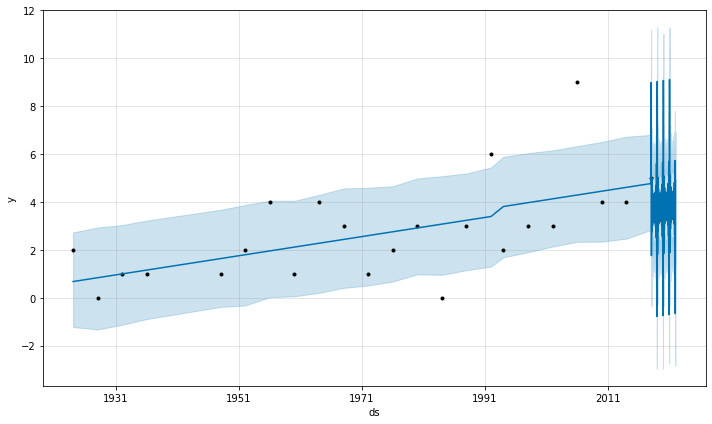

In [98]:
# Plot the forecast by calling the Prophet.plot method and passing in the forecast dataframe
fig1 = model.plot(forecast)

---
## Part 2
## Create the medal count forecast for Beijing 2022
---
### Run the Simulation for each Medal_x and Country that we want to forecast
Prophet was run manually for each cell value and manually tabulated into a csv called 'beijing_total_medal_count_forecast.csv'

### Read in csv of Prophet forecast results

In [197]:
beijing_total_medal_count_forecast_df = pd.read_csv(Path('Resources/beijing_total_medal_count_forecast.csv'))
beijing_total_medal_count_forecast_df


,Country,Gold,Silver,Bronze,Total
0,Germany,13.304938,12.423865,8.468517,34.200475
1,United States,8.737703,8.930442,8.167370,25.873304
2,Norway,9.542529,8.494180,7.470627,25.586041
3,Canada,8.636452,7.711165,6.090819,22.464903
4,ROC,3.723646,7.287529,11.142462,22.269231
5,Austria,4.930853,5.561746,7.326002,17.864528
6,South Korea,5.162205,7.557807,3.423116,16.131148
7,Netherlands,5.998734,4.097720,5.313305,15.422468
8,Switzerland,4.610455,3.585948,3.956117,12.068417
9,Italy,3.282677,3.278728,5.432943,11.994356


---
---

In [133]:
trend_plot_df = trendline_plot_df.groupby(['Year', 'Country']).sum()
trend_plot_df

Gold_x  Silver_x  Bronze_x  Total_x
Year Country                                           
1924 Austria           2.0       1.0       0.0      3.0
     Belgium           0.0       0.0       1.0      1.0
     Canada            1.0       0.0       0.0      1.0
     Finland           4.0       4.0       3.0     11.0
     France            0.0       0.0       3.0      3.0
...                    ...       ...       ...      ...
2018 Spain             0.0       0.0       2.0      2.0
     Sweden            7.0       6.0       1.0     14.0
     Switzerland       4.0       6.0       4.0     14.0
     Ukraine           1.0       0.0       0.0      1.0
     United States     9.0       8.0       6.0     23.0

[408 rows x 4 columns]

# Create an interactive plot of medal trendlines by country

### Group the DataFrame by Country

In [ ]:
all_winter_medals_df.groupby('Country').sum()

In [ ]:
all_winter_medals_df=pd.read_csv(Path('Resources/all_winter_medals_locations_gsb.csv'))

# all_winter_medal_df = all_winter_medals_df.groupby(['Country','Year']).sum(['Gold','Silver', 'Bronze'])
medals = ['Gold','Silver', 'Bronze']
for m in medals:
    all_winter_medals_df[f'Cumulative {m}'] = (1 + all_winter_medals_df[m]).cumsum()
    
    
all_winter_medals_df

### Use a for loop to sum the medal returns

In [ ]:
# all_winter_medal_df = all_winter_medals_df.groupby(['Country','Year']).sum(['Gold','Silver', 'Bronze'])
medals = ['Gold','Silver', 'Bronze']
for m in medals:
    all_winter_medals_df[f'Cumulative {m}'] = (1 + all_winter_medals_df[m]).cumsum()
    
    
all_winter_medals_df

In [ ]:
total_medals_by_country.columns = total_medals_by_country.str.replace('Event' , 'Total Medals')
total_medals_by_country

In [32]:
combined_cum_returns_df['Total_y'] = combined_cum_returns_df.groupby('Country').sum(['Gold_y', 'Silver_y', 'Bronze_y'])

NameError: name 'combined_df' is not defined

### Plot the data by country

In [ ]:
all_winter_medals_df.hvplot(groupby="Country")

### Create a cumulative gold column in th original dataframe

In [ ]:
all_winter_medals_df['Cumulative Gold'] = (1 + all_winter_medals_df['Gold']).cumsum()

all_winter_medals_df

### Loop over the countries and add columns for cumulative sum of gold, silver, bronze medals

In [ ]:
# Create a for loop for new columns

# Create empty lists for the for loops
gold = []
silver = []
bronze = []

'''
Create a function that loops over the countries and does a cumulative sum of the gold, silver, bronze medals
'''
for medal in all_winter_medals_df['Country']:
    if all_winter_medals_df['Gold'] == 1:
        gold.append()
    elif all_winter_medals_df['Silver'] == 1:
            silver.append()
    elif all_winter_medals_df['Bronze'] == 1:
            bronze.append()



# Return the results as new columns of the cumulative sum
cumulative_returns_df["Cumulative Gold"] = gold.sum()
cumulative_returns_df["Cumulative Silver"] = silver.sum()
cumulative_returns_df["Cumulative Bronze"] = bronze.sum()

# Display the dataframe
cumulative_returns_df


### Create a total medal count DataFrame

In [ ]:
# Group the csv by country and count total medals in 2018
medal_count_by_country = all_winter_medals_df.groupby('Country').mean()

# Clean the DataFrame
#total_medal_count = medal_count_by_country['Medal Rank']

# Display the resulting DataFame
medal_count_by_country
#total_medal_count

### Create a gold medal count DataFrame

In [ ]:
all_winter_medals_df.groupby('Country').count('Medal Rank' = 1)

In [ ]:
gold = []
for country in 'Country':
    if 'Medal Rank' = 1

### Create a Geoviews of the Medal Data

In [ ]:
all_winter_medals_df.hvplot.points(
    'Lon',
    'Lat',
    geo=True,
    size='Medal Rank',
    color='gross_rent',
    tiles='OSM',
    frame_width=700,
    frame_height=500,
    title='Neighborhood Map Comparing Sale Prices Per Sqft and Gross Rent - San Francisco 2010-2016')

In [ ]:
# Group the csv by country and count total medals in 2018
medal_count_by_country = all_winter_medals_df.count(axis= 'Medal Rank')
medal_count_by_country

In [ ]:
#for medal in 'Medal Rank'
   # if ['Medal Rank'] = 1
   # print('hello')

#gold_count_by_country = all_winter_medals_df.groupby('Medal Rank').sum()


total_medals_df = pd.DataFrame({
    'Country': all_winter_medals_df['Country'].drop_duplicates()
   # 'Gold': all_winter_medals_df.count(['Medal Rank' = 1])
    #'Silver': all_winter_medals_df['Medal Rank' = 2]
    #'Bronze': all_winter_medals_df['Medal Rankk' =3]
        
        })
    
total_medals_df

In [ ]:
gold_count_by_country = all_winter_medals_df[[
    'Country', 
    for gold in 'Medal Rank'
        if 'Medal Rank' = 1
    return len
gold_count_by_country

### Count Total Medals by Country

In [ ]:
first_info = {'Name_1': ['Span', 'Vetts', 'Such', 'Deepthi', 'Appu'],
'Name_2': ['Rao', 'Segar', 'Athreya', 'Vc', 'Nags'],
'Marks': [35, 45, 38, 92, 15] }



df = pd.DataFrame(first_info, columns = ['Name_1', 'Name_2', 'Marks'])

final = [] 

for value in df["Marks"]:
    
    if value >= 50:
        final.append("Pass")
    elif value < 0 and value > 100:
    final.append("Invalid")
    else:
    final.append("Fail")
    
df["Final"] = final
print(df)

In [ ]:
gold = []
not_gold = []

for gold in all_winter_medals_df['Medal Rank']:
    if gold = 1:
        gold.append()
    else:
        gold.append('Total Not Gold Medals')

all_winter_medals_df["Total Gold"] = gold
print(all_winter_medals_df)

In [ ]:
cumulative_returns_df = all_winter_medals_df['Country']

cumulative_returns_df